In [1]:
# CIND 820 - D10: Big Data Analytics Project
# Title: Telco Customer Churn Prediction
# Subtitle: Initial Results and the Code
# Student Name: Sei Ryun Kim
# Student Number: 500286795
# Supervisor's Name: Dr. M. Bilgehan Erdem

In [2]:
# 5 steps of approach for the project

In [3]:
# Step 1: Initial Data Analysis

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read csv file data

telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Information of data

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Describe data

telco.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5294-IMHHT,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# Step 2: Data Preparation

In [9]:
# Check if there are any missing values

telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Check if there are any null values

telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Check if there are any empty values in total charges

telco[telco['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# Replacing 11 empty values with 0 for total charges

print('Before removing empty values')
print(telco[telco['TotalCharges'] == ' '].index)

telco['TotalCharges'] = np.where(telco['TotalCharges'] == ' ', telco['MonthlyCharges'], telco['TotalCharges'])

print('After removing empty values')
print(telco[telco['TotalCharges'] == ' '].index)

Before removing empty values
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
After removing empty values
Int64Index([], dtype='int64')


In [13]:
telco[telco['TotalCharges'] == telco['MonthlyCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [14]:
# Convert the types of TotalCharges from object to float64

telco.info()
telco['TotalCharges'] = telco['TotalCharges'].astype(float)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Count the values to answer 'Yes' or 'No' for churn

telco.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

No handles with labels found to put in legend.


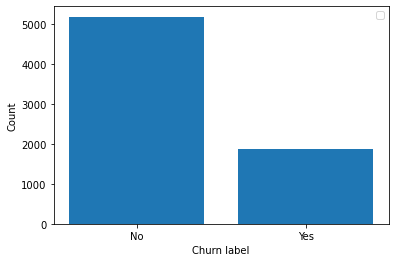

In [16]:
# Visualization of churn value count

plt.bar(x = telco['Churn'].unique(), height = telco.Churn.value_counts())
plt.legend()
plt.xlabel("Churn label")
plt.ylabel("Count")
plt.show()

In [17]:
# Step 3: Exploratory Data Analysis

In [18]:
# Demographic

# How do demographics including gender, partner and dependents affect to churn?

telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size()

telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name = 'Count')

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
6,Female,Yes,Yes,No,751
7,Female,Yes,Yes,Yes,132
8,Male,No,No,No,1089
9,Male,No,No,Yes,536


Churn Percentages are
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


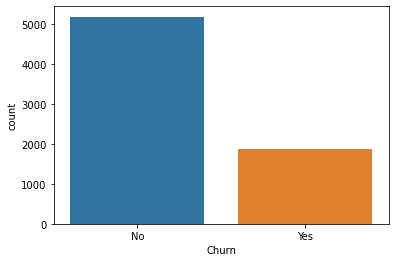

In [19]:
# Visualization of churn percentage

sns.countplot(telco.Churn);
print ('Churn Percentages are\n', telco.Churn.value_counts() / telco.Churn.count())

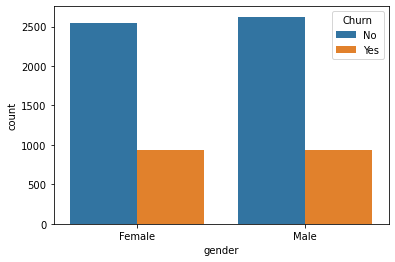

In [20]:
# Visualization how gender affects churn

sns.countplot(x = 'gender', hue = 'Churn', data = telco);

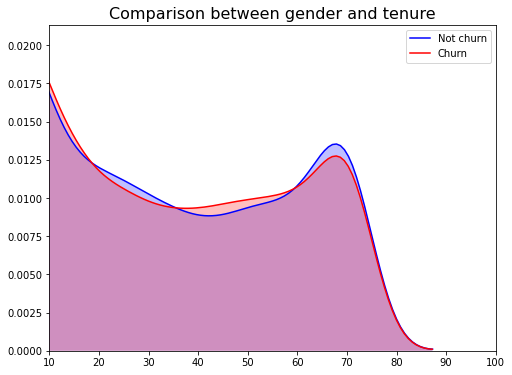

In [21]:
# Visualization of comparison between gender and tenure regarding churn

plt.figure(figsize = (8, 6))

sns.kdeplot(telco[telco['gender'] == 'Male']['tenure'], color = 'blue', shade = True)
sns.kdeplot(telco[telco['gender'] == 'Female']['tenure'], color= 'red', shade = True) 

plt.title('Comparison between gender and tenure', fontsize = 16)
plt.legend(['Not churn', 'Churn'], loc = 'upper right');
plt.xlim([10, 100])
plt.show()

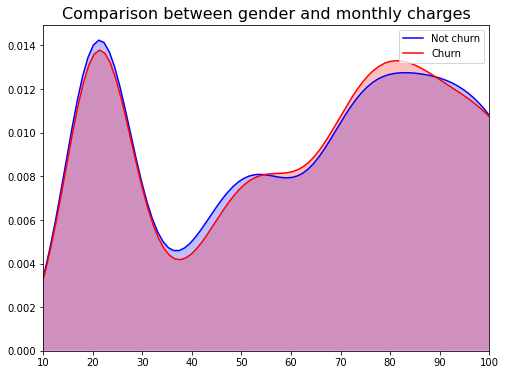

In [22]:
# Visualization of comparison between gender and monthly charges regarding churn

plt.figure(figsize=(8,6))

sns.kdeplot(telco[telco['gender'] == 'Male']['MonthlyCharges'], color = 'blue', shade = True)
sns.kdeplot(telco[telco['gender'] == 'Female']['MonthlyCharges'], color = 'red', shade = True) 

plt.title('Comparison between gender and monthly charges', fontsize = 16)
plt.legend(['Not churn', 'Churn'], loc = 'upper right');
plt.xlim([10, 100])
plt.show()

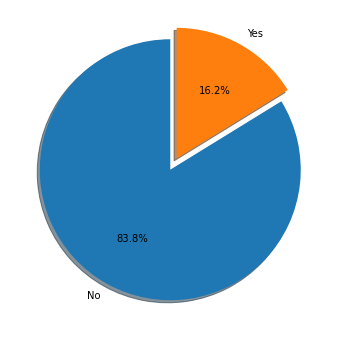

In [23]:
# Visualization of senior citizen percentage

plt.figure(figsize = (8, 6))
sizes = telco.SeniorCitizen.value_counts()
labels = ['No', 'Yes']
explode = (0, 0.1,)

plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.show() 

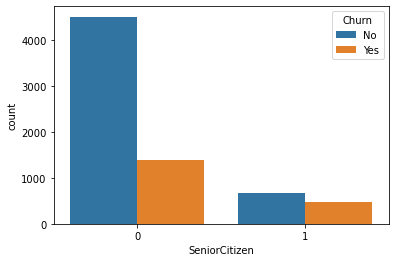

In [24]:
# Visualization how senior citizen affects churn

sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = telco);

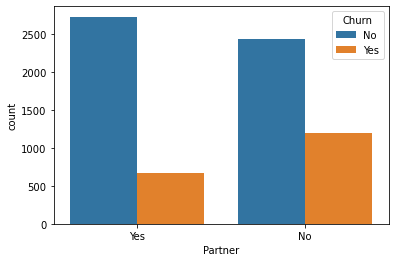

In [25]:
# Visualization how partner affects churn

sns.countplot(x = 'Partner', hue = 'Churn', data = telco);

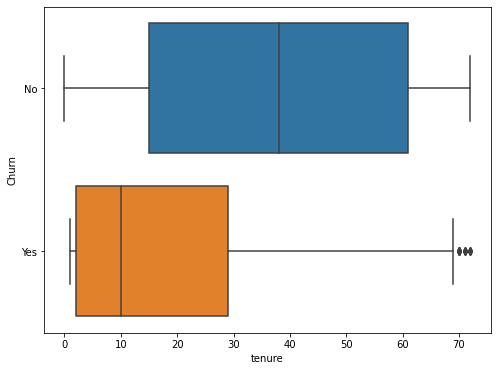

In [26]:
# Visualization how tenure affects churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'tenure', y = 'Churn', data = telco);

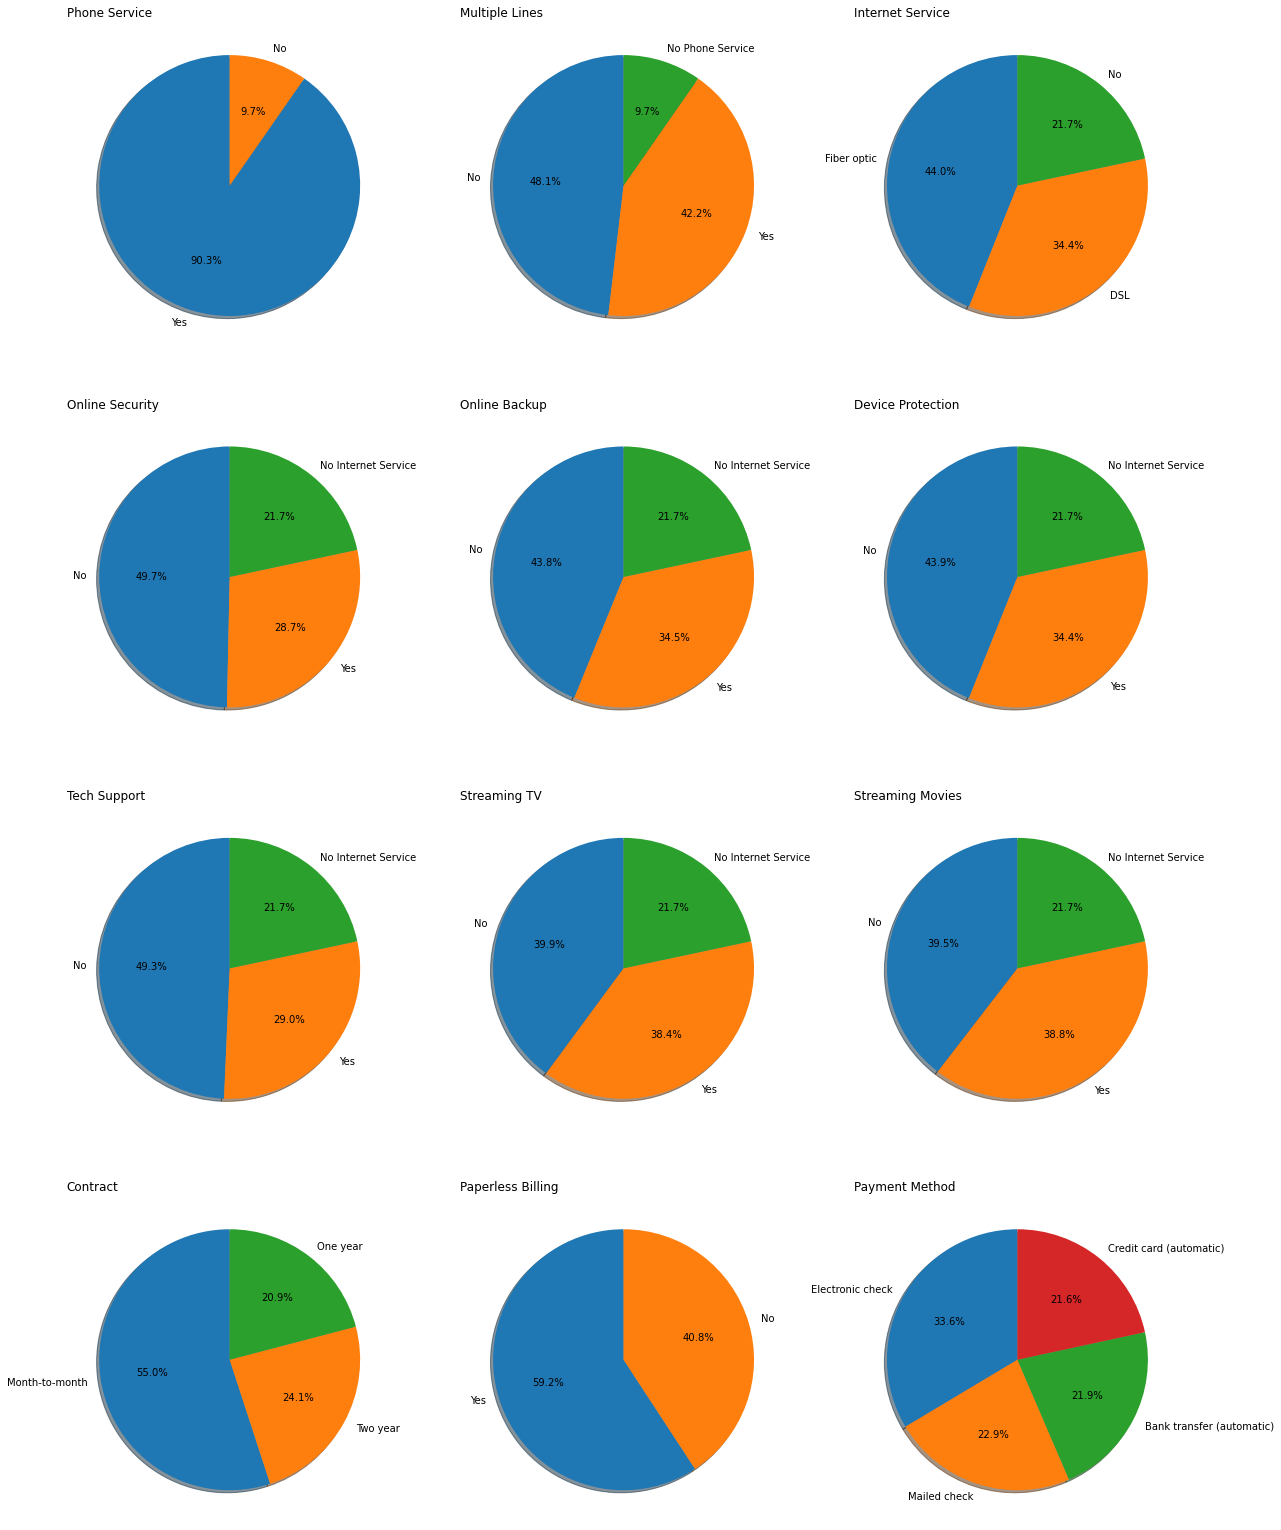

In [27]:
# Visualizations of percentage for phone services, internet services, and payment methods

plt.figure(figsize = (20, 42))

plt.subplot(6, 3, 1)
sizes = telco.PhoneService.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Phone Service', loc = 'left')

plt.subplot(6, 3, 2)
sizes = telco.MultipleLines.value_counts()
labels = ['No', 'Yes', 'No Phone Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Multiple Lines', loc = 'left')

plt.subplot(6, 3, 3)
sizes = telco.InternetService.value_counts()
labels = ['Fiber optic', 'DSL', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Internet Service', loc = 'left')

plt.subplot(6, 3, 4)
sizes = telco.OnlineSecurity.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Security', loc = 'left')

plt.subplot(6, 3, 5)
sizes = telco.OnlineBackup.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Backup', loc = 'left')

plt.subplot(6, 3, 6)
sizes = telco.DeviceProtection.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Device Protection', loc = 'left')

plt.subplot(6, 3, 7)
sizes = telco.TechSupport.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Tech Support', loc = 'left')

plt.subplot(6, 3, 8)
sizes = telco.StreamingTV.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming TV', loc = 'left')

plt.subplot(6, 3, 9)
sizes = telco.StreamingMovies.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming Movies', loc = 'left')

plt.subplot(6, 3, 10)
sizes = telco.Contract.value_counts()
labels = ['Month-to-month', 'Two year', 'One year']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Contract', loc = 'left')

plt.subplot(6, 3, 11)
sizes = telco.PaperlessBilling.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Paperless Billing', loc = 'left')

plt.subplot(6, 3, 12)
sizes = telco.PaymentMethod.value_counts()
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Payment Method', loc = 'left');

In [28]:
columns = {'PhoneService' : 1, 'MultipleLines' : 2, 'InternetService' : 3, 'OnlineSecurity' : 4, 'OnlineBackup' : 5, 'DeviceProtection' : 6,
          'TechSupport' : 7, 'StreamingTV' : 8, 'StreamingMovies' : 9, 'Contract' : 10, 'PaperlessBilling' : 11, 'PaymentMethod' : 12}

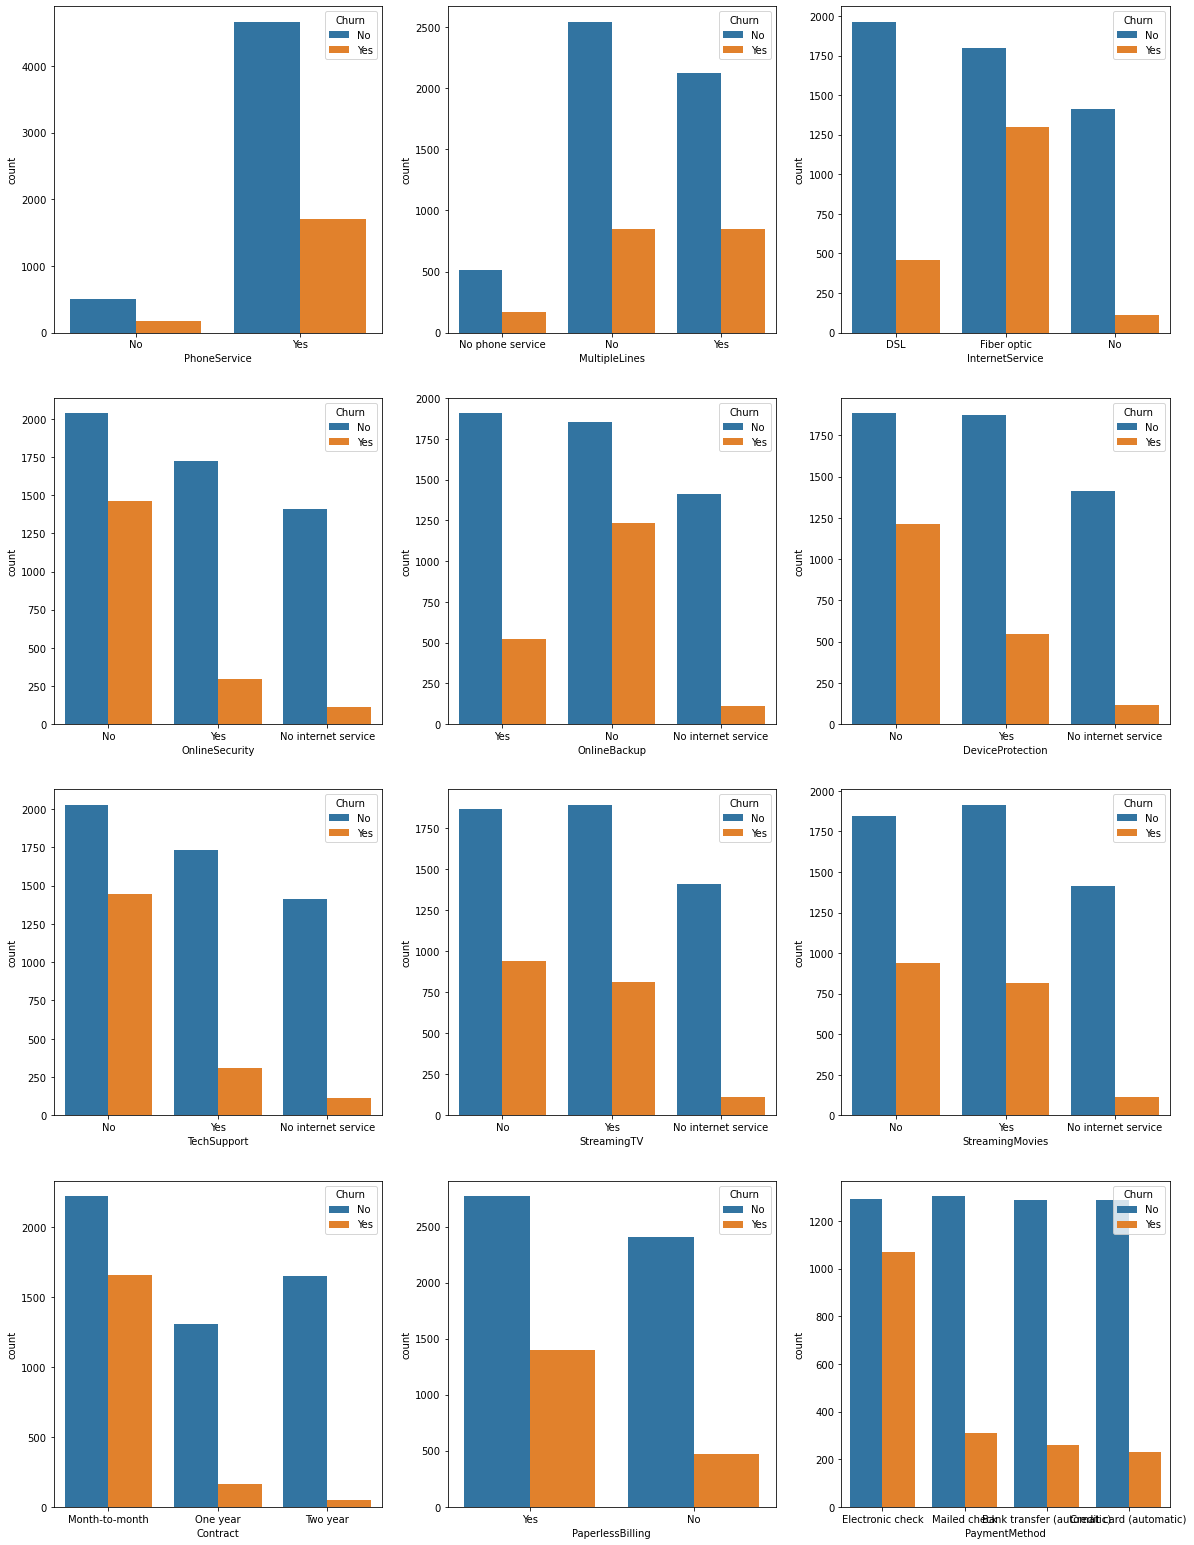

In [29]:
# Visualizations how phone services, internet services, and payment methods affect churn

plt.figure(figsize = (20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x = key, hue = 'Churn', data = telco)

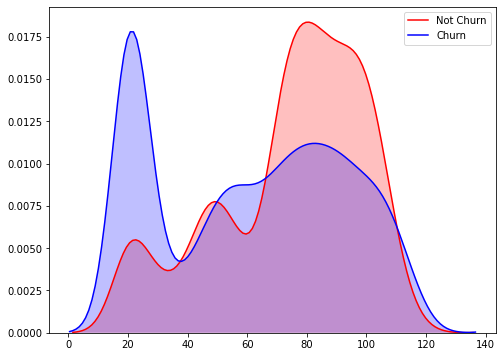

In [30]:
# Visualization how monthly charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['MonthlyCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['MonthlyCharges'], color = 'blue', shade = True)
plt.legend(['Not Churn', 'Churn'], loc = 'upper right');

In [31]:
telco.TotalCharges.dtype

dtype('float64')

In [32]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors = 'coerce')

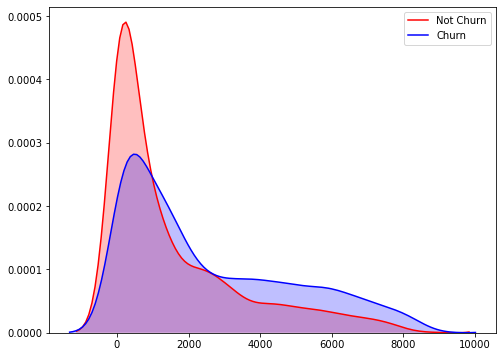

In [33]:
# Visualization how total charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['TotalCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['TotalCharges'], color = 'blue', shade = True)
plt.legend(['Not Churn', 'Churn'],loc = 'upper right');

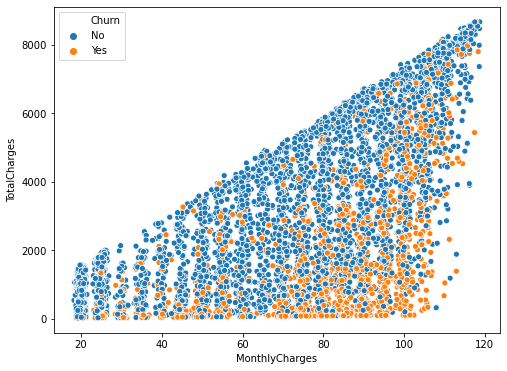

In [34]:
# Visualization of comparison between monthly charges and total charges regarding churn

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', data = telco);

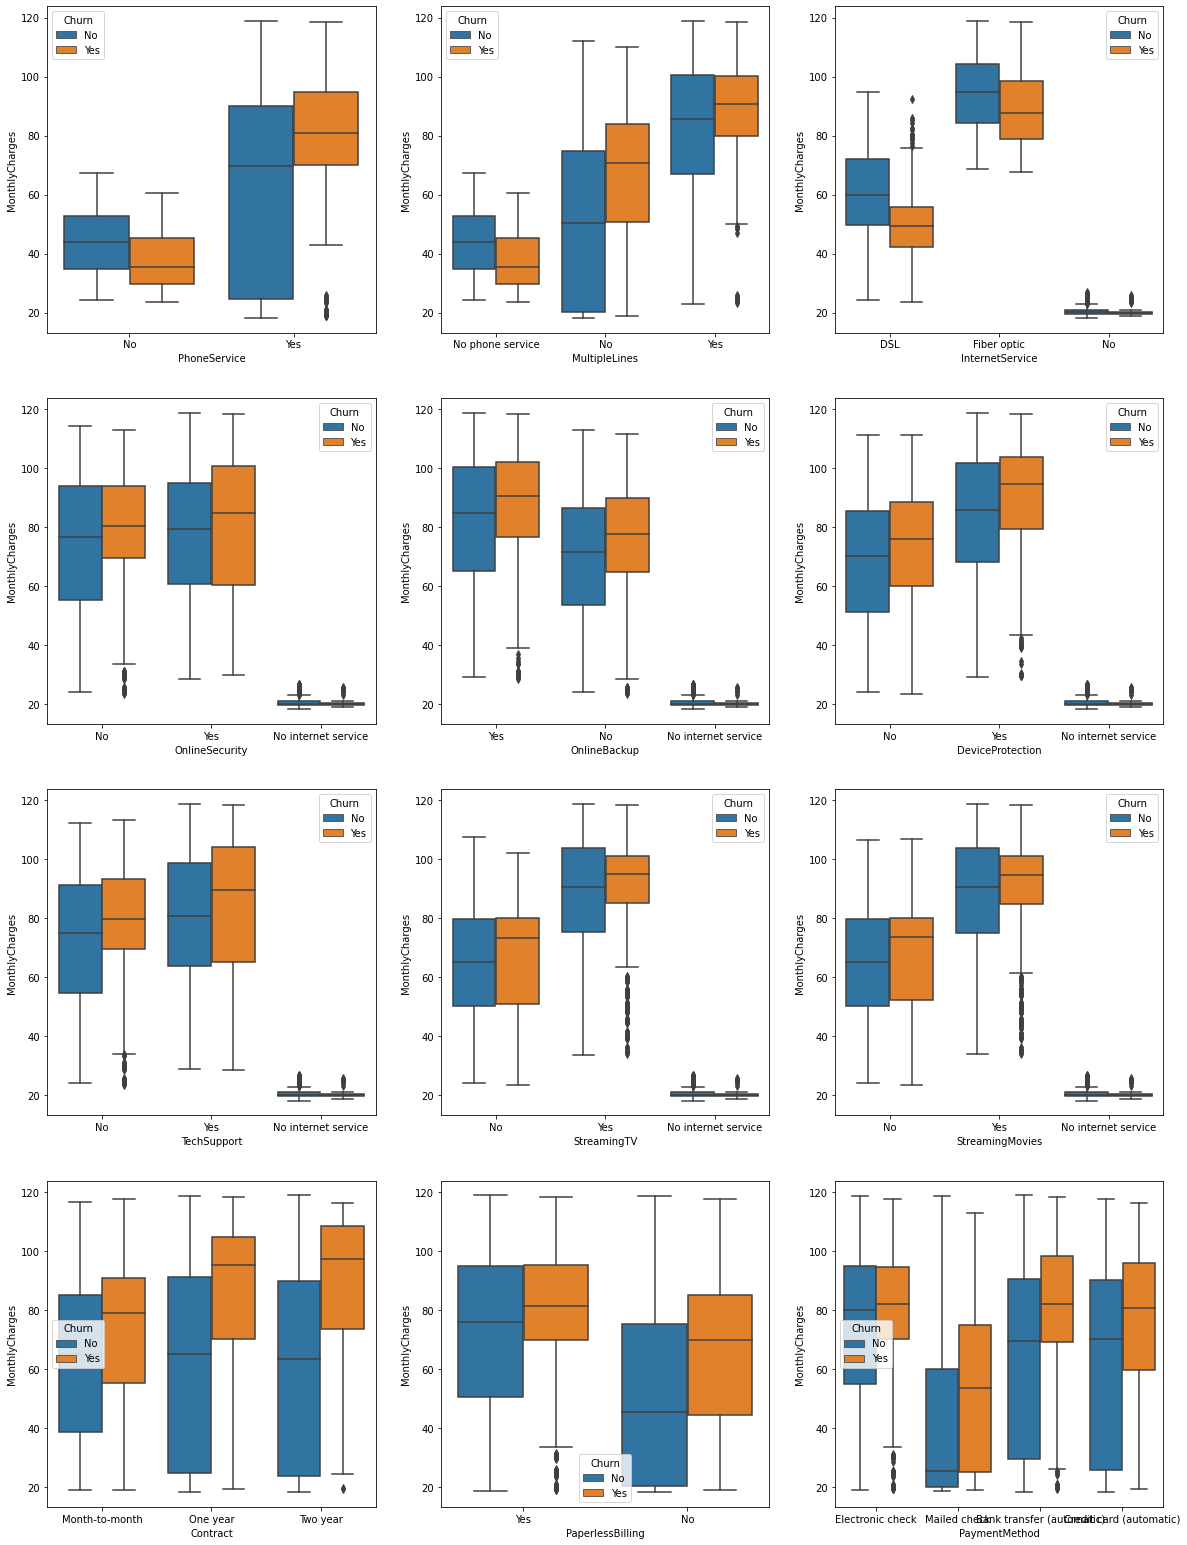

In [35]:
# Visualization of comparison between services and monthly charges regarding churn

plt.figure(figsize = (20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x = key, y = 'MonthlyCharges', hue = 'Churn', data = telco);

In [36]:
# Correlation between variables

# Drop customerID variable
# Replace 'Yes' to 1 and 'No' to o for Churn variable

telco.drop('customerID', axis = 1, inplace = True)
telco['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
telco['Churn'].replace(to_replace = 'No', value = 0, inplace = True)
telco = pd.get_dummies(telco)

In [37]:
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [38]:
telco.shape

(7043, 46)

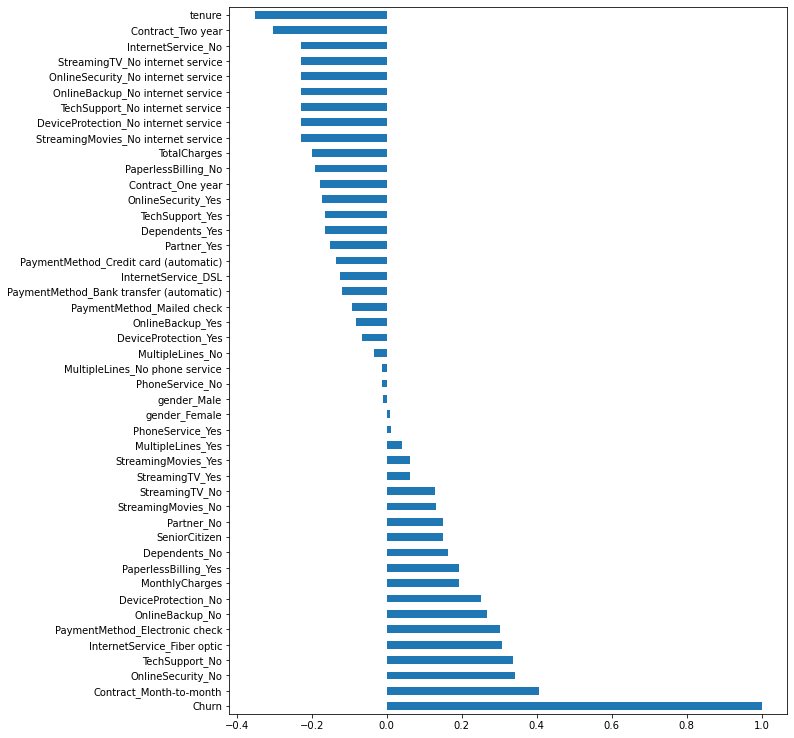

In [39]:
# Visualization of correlation

plt.figure(figsize = (10, 13))
telco.corr()['Churn'].sort_values(ascending = False).plot(kind = 'barh')

In [40]:
# Step 4: Building Predictive Models

In [41]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [42]:
X = telco.drop(columns = ['Churn'])
y = telco['Churn'].values

In [43]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [44]:
# Scale the data
# Normalization

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [45]:
X

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649,  1.36937906,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 45), (1409, 45), (5634,), (1409,))

In [48]:
def apply_model(model1):
    model = model1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('--')
    print ('Precision score is ', precision)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

In [49]:
# Logistic Regression

apply_model(LogisticRegression())

Train score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=Fals is 0.8022719204827832 %
--
Precision score is  0.6840490797546013
--
ROC Score is 0.749217189230594
--
Recall Score is  0.5978552278820375
--
Confusion Matrix

 [[933 103]
 [150 223]]


In [50]:
# Support Vector Machine

apply_model(SVC())

Train score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=Fals is 0.7967696130635428 %
--
Precision score is  0.6901408450704225
--
ROC Score is 0.7202635419793595
--
Recall Score is  0.5254691689008043
--
Confusion Matrix

 [[948  88]
 [177 196]]


In [51]:
# K Neibours

apply_model(KNeighborsClassifier())

Train score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform is 0.7575434859779908 %
--
Precision score is  0.5504322766570605
--
ROC Score is 0.6807425962921941
--
Recall Score is  0.5120643431635389
--
Confusion Matrix

 [[880 156]
 [182 191]]


In [52]:
# Random Forest

apply_model(RandomForestClassifier())

Train score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=Fals is 0.7839900603478879 %
--
Precision score is  0.6602316602316602
--
ROC Score is 0.686751477636196
--
Recall Score is  0.4584450402144772
--
Confusion Matrix

 [[948  88]
 [202 171]]


In [53]:
# AdaBoost

apply_model(AdaBoostClassifier())

Train score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=Non is 0.7992545260915868 %
--
Precision score is  0.6773162939297125
--
ROC Score is 0.735437131884853
--
Recall Score is  0.5683646112600537
--
Confusion Matrix

 [[935 101]
 [161 212]]
